### ♦ In this notebook, We will calculate time domain features from raw data and form a feature matrix. 



♦ To compute feature matrix, we will first segment our data into segments of length 1024 as we did in preprocessing. 

♦ There is no overlap between consecutive segments. We will then compute time domain features for each segment. 

♦ We will use the already segmented raw time domain data CSV that we had created in previous notebook of preprocessing. 


### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("Preprocessed features from the Raw Matlab data.csv")

In [3]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,-0.041097,-0.046104,-0.028372,0.001252,0.033796,0.069886,0.117242,0.164389,0.200688,...,0.005215,0.029623,0.039428,0.057369,0.087201,0.125169,0.151038,0.136017,0.101387,0.066548
1,1,0.048399,0.048399,0.050902,0.050485,0.040889,0.039846,0.055492,0.069678,0.064879,...,0.093877,-0.045478,-0.196098,-0.329195,-0.400750,-0.418900,-0.379263,-0.286012,-0.157087,0.012934
2,2,0.186711,0.318764,0.398455,0.410764,0.369875,0.291853,0.188588,0.079691,-0.045687,...,0.269948,0.210076,0.138103,0.061124,-0.014394,-0.089913,-0.166475,-0.225513,-0.253676,-0.229268
3,3,-0.173777,-0.105977,-0.030041,0.042975,0.127047,0.213205,0.274538,0.294148,0.268905,...,0.125795,0.118076,0.112235,0.107020,0.088662,0.060498,0.030249,0.014603,0.011891,0.010014
4,4,-0.003964,-0.031501,-0.057369,-0.071764,-0.064879,-0.053823,-0.037968,-0.011057,0.023365,...,-0.009388,-0.011265,0.001669,0.018358,0.025242,0.013351,0.008970,0.014186,0.018150,0.010431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,4595,-0.022113,0.033587,0.040889,0.036925,0.028163,0.042558,0.056535,0.061959,0.046313,...,0.013351,0.024408,0.044435,0.054449,0.025451,-0.035465,-0.078648,-0.084281,-0.025660,0.030666
4596,4596,0.046104,0.042975,0.047356,0.064879,0.064254,0.027120,-0.047356,-0.129133,-0.178575,...,0.020653,0.066340,0.066757,0.022948,-0.023782,-0.036925,-0.027329,-0.018984,-0.037968,-0.083655
4597,4597,-0.105559,-0.078022,-0.015646,0.022530,0.016063,-0.024408,-0.057161,-0.044018,-0.023365,...,0.170439,0.168353,0.129550,0.109106,0.089705,0.054449,-0.017941,-0.096589,-0.118285,-0.081151
4598,4598,-0.002503,0.053614,0.074893,0.087618,0.100970,0.112861,0.086158,0.035047,-0.025868,...,-0.045270,-0.019610,0.031084,0.063836,0.055909,0.030041,0.009805,0.007302,0.006467,-0.021279


In [4]:
df.shape

(4600, 1025)

In [5]:
df.drop(df.columns[[0]], axis = 1, inplace = True) 

In [6]:
df.shape

(4600, 1024)

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.041097,-0.046104,-0.028372,0.001252,0.033796,0.069886,0.117242,0.164389,0.200688,0.215082,...,0.005215,0.029623,0.039428,0.057369,0.087201,0.125169,0.151038,0.136017,0.101387,0.066548
1,0.048399,0.048399,0.050902,0.050485,0.040889,0.039846,0.055492,0.069678,0.064879,0.037342,...,0.093877,-0.045478,-0.196098,-0.329195,-0.400750,-0.418900,-0.379263,-0.286012,-0.157087,0.012934
2,0.186711,0.318764,0.398455,0.410764,0.369875,0.291853,0.188588,0.079691,-0.045687,-0.149369,...,0.269948,0.210076,0.138103,0.061124,-0.014394,-0.089913,-0.166475,-0.225513,-0.253676,-0.229268
3,-0.173777,-0.105977,-0.030041,0.042975,0.127047,0.213205,0.274538,0.294148,0.268905,0.209867,...,0.125795,0.118076,0.112235,0.107020,0.088662,0.060498,0.030249,0.014603,0.011891,0.010014
4,-0.003964,-0.031501,-0.057369,-0.071764,-0.064879,-0.053823,-0.037968,-0.011057,0.023365,0.070303,...,-0.009388,-0.011265,0.001669,0.018358,0.025242,0.013351,0.008970,0.014186,0.018150,0.010431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.022113,0.033587,0.040889,0.036925,0.028163,0.042558,0.056535,0.061959,0.046313,0.008553,...,0.013351,0.024408,0.044435,0.054449,0.025451,-0.035465,-0.078648,-0.084281,-0.025660,0.030666
4596,0.046104,0.042975,0.047356,0.064879,0.064254,0.027120,-0.047356,-0.129133,-0.178575,-0.149994,...,0.020653,0.066340,0.066757,0.022948,-0.023782,-0.036925,-0.027329,-0.018984,-0.037968,-0.083655
4597,-0.105559,-0.078022,-0.015646,0.022530,0.016063,-0.024408,-0.057161,-0.044018,-0.023365,-0.015229,...,0.170439,0.168353,0.129550,0.109106,0.089705,0.054449,-0.017941,-0.096589,-0.118285,-0.081151
4598,-0.002503,0.053614,0.074893,0.087618,0.100970,0.112861,0.086158,0.035047,-0.025868,-0.067174,...,-0.045270,-0.019610,0.031084,0.063836,0.055909,0.030041,0.009805,0.007302,0.006467,-0.021279


We will calculate time domain features from the above CSV file.

Time domain features that we will calculate are 

♦  Maximum value

♦  Minimum value

♦  Mean value

♦  Standard deviation (Unbiased standard deviation)

♦  Root mean square value (RMS)

♦  Skewness

♦  Kurtosis

♦  Crest factor

♦  Form factor

### ♦  Function for calculating Skewness

In [8]:
def compute_skewness(x):
    """x should be 1D np array."""
    N = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / N
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

### ♦  Function for calculating Kurtosis

In [9]:
def compute_kurtosis(x):
    """x should be 1D np array."""
    N = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / N
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

### Final Operation i.e.implementing all the functions built and built-in functions We create Feature Time Matrix

In [10]:
feature_matrix_time = np.repeat(np.nan, 4600*9).reshape((4600,9))
N = df.shape[1]
for i in np.arange(df.shape[0]):
    temp = df.iloc[i]
    feature_matrix_time[i,0] = np.max(temp)
    feature_matrix_time[i,1] = np.min(temp)
    feature_matrix_time[i,2] = np.mean(temp)
    feature_matrix_time[i,3] = np.std(temp, ddof = 1)
    feature_matrix_time[i,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix_time[i,5] = compute_skewness(temp)
    feature_matrix_time[i,6] = compute_kurtosis(temp)
    feature_matrix_time[i,7] = feature_matrix_time[i,0]/feature_matrix_time[i,4]
    feature_matrix_time[i,8] = feature_matrix_time[i,4]/feature_matrix_time[i,2]

In [11]:
feature_matrix_time 

array([[ 0.35986154, -0.32606585,  0.01903677, ..., -0.17357846,
         2.92343902,  6.46618676],
       [ 0.33399323, -0.41889969,  0.016644  , ...,  0.06640677,
         2.67385072,  7.50486191],
       [ 0.41076369, -0.36111323,  0.02322822, ..., -0.41005915,
         3.16604871,  5.5854539 ],
       ...,
       [ 0.214248  , -0.22405292,  0.01233011, ...,  0.03812271,
         3.08643424,  5.62979947],
       [ 0.19609846, -0.24720923,  0.01269885, ...,  0.50272435,
         2.96688822,  5.20485454],
       [ 0.18817108, -0.19839323,  0.01171934, ..., -0.13527836,
         3.00357072,  5.34579137]])

In [12]:
feature_time_matrix = pd.DataFrame(feature_matrix_time , columns =['Max', 'Min', 'Mean','Stddev','RMS','skew','kurtosis','crest_factor','form_factor']) 

In [13]:
feature_time_matrix

,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest_factor,form_factor
0,0.359862,-0.326066,0.019037,0.121674,0.123095,-0.035087,-0.173578,2.923439,6.466187
1,0.333993,-0.418900,0.016644,0.123858,0.124911,-0.196543,0.066407,2.673851,7.504862
2,0.410764,-0.361113,0.023228,0.127706,0.129740,0.087575,-0.410059,3.166049,5.585454
3,0.467716,-0.336705,0.021281,0.137159,0.138734,0.247045,0.139518,3.371323,6.519001
4,0.468550,-0.438092,0.019683,0.158518,0.159658,0.006540,-0.407030,2.934707,8.111655
...,...,...,...,...,...,...,...,...,...
4595,0.207990,-0.186919,0.014878,0.068253,0.069823,-0.154576,-0.039878,2.978801,4.692954
4596,0.195055,-0.181495,0.012885,0.065278,0.066506,-0.312184,-0.015466,2.932901,5.161398
4597,0.214248,-0.224053,0.012330,0.068346,0.069416,-0.337865,0.038123,3.086434,5.629799
4598,0.196098,-0.247209,0.012699,0.064896,0.066096,-0.411371,0.502724,2.966888,5.204855


In [14]:
lst = []

for _ in range(460):
    value = 'B007'
    lst.append(value)
    
for _ in range(460,920):
    value = 'B014'
    lst.append(value)

for _ in range(920,1380):
    value = 'B021'
    lst.append(value)
    
for i in range(1380,1840):
    value='IR007'
    lst.append(value)
    
for i in range(1840,2300):
    value='IR014'
    lst.append(value)
    
for i in range(2300,2760):
    value='IR021'
    lst.append(value)
    
for _ in range(2760,3220):
    value = 'OR007'
    lst.append(value)
    
for _ in range(3220,3680):
    value = 'OR014'
    lst.append(value)
    
for _ in range(3680,4140):
    value = 'OR021'
    lst.append(value)
    
for _ in range(4140,4600):
    value = 'Normal'
    lst.append(value)
    


In [15]:
lst

['B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 'B007',
 

In [16]:
feature_time_matrix['fault']=lst

In [17]:
feature_time_matrix

,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest_factor,form_factor,fault
0,0.359862,-0.326066,0.019037,0.121674,0.123095,-0.035087,-0.173578,2.923439,6.466187,B007
1,0.333993,-0.418900,0.016644,0.123858,0.124911,-0.196543,0.066407,2.673851,7.504862,B007
2,0.410764,-0.361113,0.023228,0.127706,0.129740,0.087575,-0.410059,3.166049,5.585454,B007
3,0.467716,-0.336705,0.021281,0.137159,0.138734,0.247045,0.139518,3.371323,6.519001,B007
4,0.468550,-0.438092,0.019683,0.158518,0.159658,0.006540,-0.407030,2.934707,8.111655,B007
...,...,...,...,...,...,...,...,...,...,...
4595,0.207990,-0.186919,0.014878,0.068253,0.069823,-0.154576,-0.039878,2.978801,4.692954,Normal
4596,0.195055,-0.181495,0.012885,0.065278,0.066506,-0.312184,-0.015466,2.932901,5.161398,Normal
4597,0.214248,-0.224053,0.012330,0.068346,0.069416,-0.337865,0.038123,3.086434,5.629799,Normal
4598,0.196098,-0.247209,0.012699,0.064896,0.066096,-0.411371,0.502724,2.966888,5.204855,Normal


In [18]:
feature_time_matrix.to_csv("feature_time_48k_1024.csv")

### Visualisaton of the Features Obtained

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
x = [i for i in range(0,4600)]

### Visualisation of feature 'Mean' across all the faults

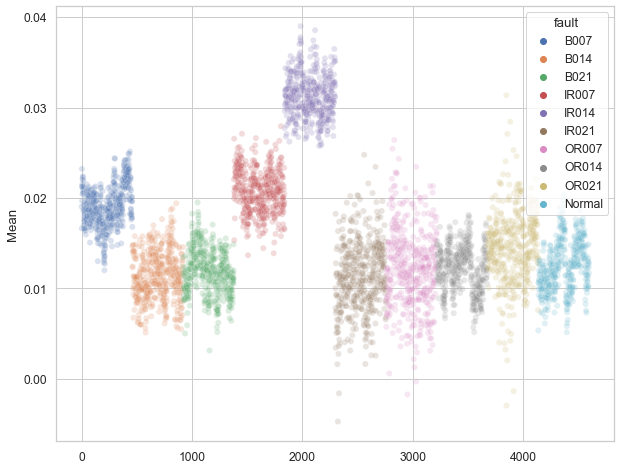

In [21]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10, 8]})
sns.scatterplot(data=feature_time_matrix,x=x,y=feature_time_matrix.Mean,color='#b53158',alpha=0.2,hue=feature_time_matrix.fault)
plt.show()

### Visualisation of feature 'RMS' across all the faults

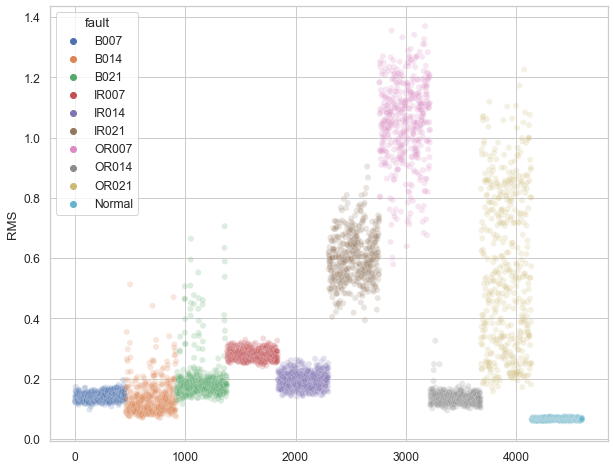

In [22]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10, 8]})
sns.scatterplot(data=feature_time_matrix,x=x,y=feature_time_matrix.RMS,color='#b53158',alpha=0.2,hue=feature_time_matrix.fault)
plt.show()

### Visualisation of feature 'Max' across all the faults

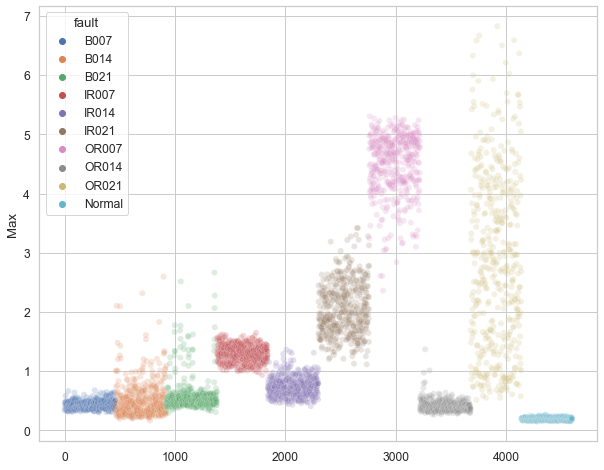

In [23]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10, 8]})
sns.scatterplot(data=feature_time_matrix,x=x,y=feature_time_matrix.Max,color='#b53158',alpha=0.2,hue=feature_time_matrix.fault)
plt.show()

### Visualisation of feature 'Min' across all the faults

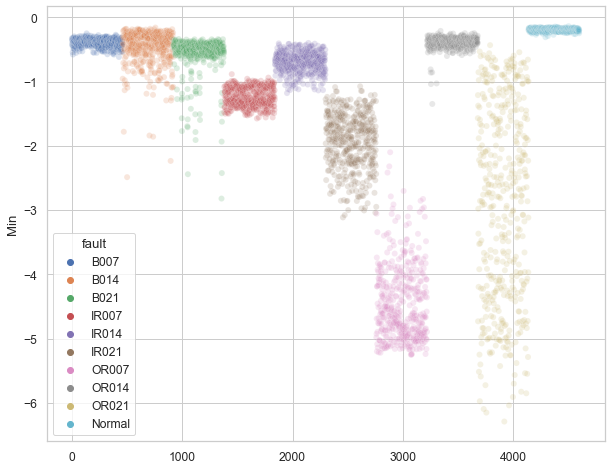

In [24]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10, 8]})
sns.scatterplot(data=feature_time_matrix,x=x,y=feature_time_matrix.Min,color='#b53158',alpha=0.2,hue=feature_time_matrix.fault)
plt.show()

### Visualisation of feature 'Crest Factor' across all the faults

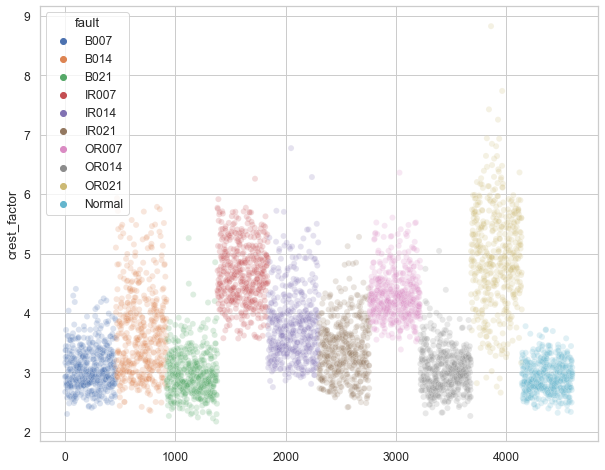

In [25]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10, 8]})
sns.scatterplot(data=feature_time_matrix,x=x,y=feature_time_matrix.crest_factor,color='#b53158',alpha=0.2,hue=feature_time_matrix.fault)
plt.show()

### EDA using the dtale library

In [26]:
import dtale
import dtale.app as dtale_app

In [27]:
dtale.show(feature_time_matrix)